In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML,clear_output
import joblib

In [50]:
ALLdataProductUserdf = pd.read_csv('../input/functional-preprocess-nowindowfeaturesextraction/ALLdataProductUserdf_addedSomeFeatures_addedDummyPrediction.csv')
trainProductUserdf = pd.read_csv('../input/functional-preprocess-nowindowfeaturesextraction/trainProductUserdf_addedSomeFeatures_addedDummyPrediction.csv')
targetFor_trainProductUserdf = pd.read_csv('../input/functional-preprocess-nowindowfeaturesextraction/targetFor_trainProductUserdf.csv')
print(ALLdataProductUserdf.shape)
print(trainProductUserdf.shape)
print(targetFor_trainProductUserdf.shape)

(318050, 18)
(318050, 18)
(318050, 6)


In [51]:
targetFor_trainProductUserdf.head(1)

,user_id,product_id,created_at,diffDay,GoneDays,index
0,577243,724112,2019-06-29,13.0,179,988009


In [52]:
targetFor_trainProductUserdf.rename(columns={'created_at':'target_created_at','GoneDays':'target_GoneDays'},inplace=True)
targetFor_trainProductUserdf.head(1)

,user_id,product_id,target_created_at,diffDay,target_GoneDays,index
0,577243,724112,2019-06-29,13.0,179,988009


In [53]:
trainProductUserdf = pd.merge(left=trainProductUserdf,
                              right=targetFor_trainProductUserdf[['user_id','product_id','target_created_at','target_GoneDays']],
                             how='inner',on=['user_id','product_id'])
print(trainProductUserdf.shape)
print('NA?\n',trainProductUserdf.isna().sum())
print('---------------------------------')
trainProductUserdf.head(3)

(318050, 20)
NA?
 user_id                     0
product_id                  0
allDiffDay                  0
LenOfList                   0
allGoneDay                  0
LastDate                    0
ProductProbPerUser          0
ProductProb                 0
avgDiffDay                  0
stdDiffDay                  0
maxDiffDay                  0
minDiffDay                  0
maxGoneDay                  0
minGoneDay                  0
medianGoneDay               0
stdGoneDay                  0
dummyPrediction_goneDay     0
dummyPrediction_datetime    0
target_created_at           0
target_GoneDays             0
dtype: int64
---------------------------------


,user_id,product_id,allDiffDay,LenOfList,allGoneDay,...,stdGoneDay,dummyPrediction_goneDay,dummyPrediction_datetime,target_created_at,target_GoneDays
0,577243,724112,"[nan, 12.0, 28.0, 55.0]",4,"[71, 83, 111, 166]",...,36.629053,197.666667,2019-07-17,2019-06-29,179
1,577243,875550,"[nan, 25.0, 59.0]",3,"[18, 43, 102]",...,35.216789,144.000000,2019-05-25,2019-06-16,166
2,577243,895941,"[nan, 7.0, 5.0, 10.0, 3.0, 71.0, 52.0, 5.0, 8....",10,"[18, 25, 30, 40, 43, 114, 166, 171, 179, 234]",...,76.057873,258.000000,2019-09-16,2019-12-13,346


In [54]:
prediction_features = ['LenOfList','ProductProbPerUser','ProductProb','avgDiffDay',
                       'stdDiffDay','maxDiffDay','minDiffDay','maxGoneDay','minGoneDay',
                       'medianGoneDay','stdGoneDay']

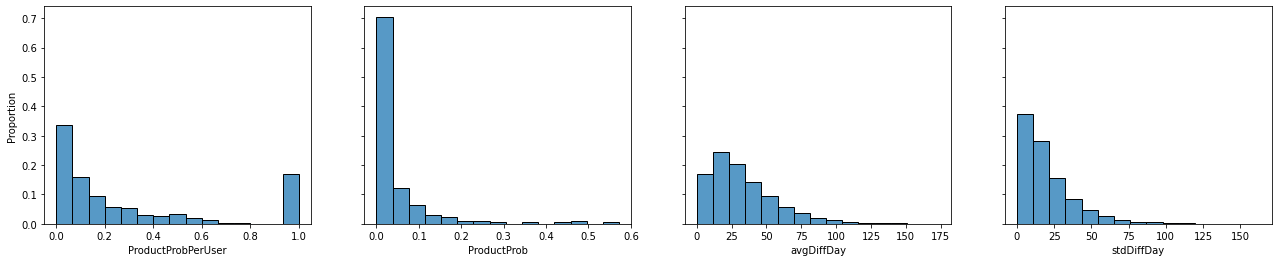

In [55]:
fig, ax=plt.subplots(1,4,sharey=True,figsize=(22,4))
sns.histplot(data=trainProductUserdf['ProductProbPerUser'],ax=ax[0],bins=15,stat='proportion')
sns.histplot(data=trainProductUserdf['ProductProb'],ax=ax[1],bins=15,stat='proportion')
sns.histplot(data=trainProductUserdf['avgDiffDay'],ax=ax[2],bins=15,stat='proportion')
sns.histplot(data=trainProductUserdf['stdDiffDay'],ax=ax[3],bins=15,stat='proportion');

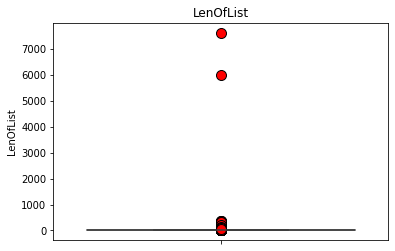

In [56]:
ax=sns.boxplot(data=trainProductUserdf,y='LenOfList', showfliers = True,
                          flierprops={"marker":"o",
                                   "markerfacecolor":"red", 
                                   "markeredgecolor":"black",
                                      "markersize":"10"})
ax.set(title='LenOfList');

"LenOfList" show length of buying sequence for each user-product.

In [57]:
#Outlier
trainProductUserdf[trainProductUserdf['LenOfList']>5000]

,user_id,product_id,allDiffDay,LenOfList,allGoneDay,...,stdGoneDay,dummyPrediction_goneDay,dummyPrediction_datetime,target_created_at,target_GoneDays
303044,29623462,2998166,"[nan, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5985,"[1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10...",...,27.147516,187.031083,2019-07-07,2019-07-07,187
303045,29623462,3900219,"[nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7617,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",...,40.104856,187.023241,2019-07-07,2019-07-07,187


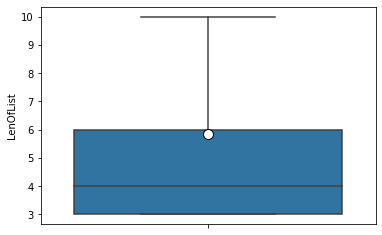

In [58]:
sns.boxplot(data=trainProductUserdf,y='LenOfList', showfliers = False,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"});

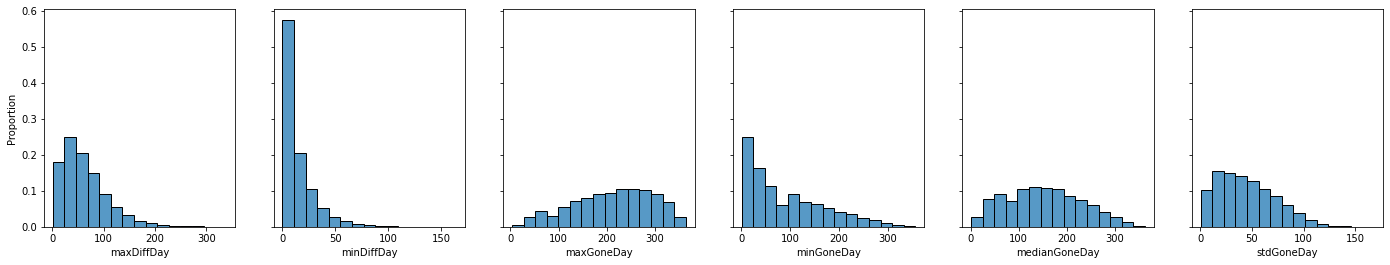

In [59]:
fig, ax=plt.subplots(1,6,sharey=True,figsize=(24,4))
sns.histplot(data=trainProductUserdf['maxDiffDay'],ax=ax[0],bins=15,stat='proportion')
sns.histplot(data=trainProductUserdf['minDiffDay'],ax=ax[1],bins=15,stat='proportion')
sns.histplot(data=trainProductUserdf['maxGoneDay'],ax=ax[2],bins=15,stat='proportion')
sns.histplot(data=trainProductUserdf['minGoneDay'],ax=ax[3],bins=15,stat='proportion')
sns.histplot(data=trainProductUserdf['medianGoneDay'],ax=ax[4],bins=15,stat='proportion')
sns.histplot(data=trainProductUserdf['stdGoneDay'],ax=ax[5],bins=15,stat='proportion');

In [60]:
trainProductUserdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318050 entries, 0 to 318049
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   318050 non-null  int64  
 1   product_id                318050 non-null  int64  
 2   allDiffDay                318050 non-null  object 
 3   LenOfList                 318050 non-null  int64  
 4   allGoneDay                318050 non-null  object 
 5   LastDate                  318050 non-null  object 
 6   ProductProbPerUser        318050 non-null  float64
 7   ProductProb               318050 non-null  float64
 8   avgDiffDay                318050 non-null  float64
 9   stdDiffDay                318050 non-null  float64
 10  maxDiffDay                318050 non-null  float64
 11  minDiffDay                318050 non-null  float64
 12  maxGoneDay                318050 non-null  int64  
 13  minGoneDay                318050 non-null  i

### The first we use "trainProductUserdf" to make a model and train it 

In [61]:
from sklearn.model_selection import RepeatedKFold, cross_validate
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Spliting data to train and test datasets.

In [62]:
trainData = trainProductUserdf.sample(frac=0.95,random_state=2)
trainData_unseen = trainProductUserdf.drop(trainData.index)
print(trainData.shape)
print(trainData_unseen.shape)

(302148, 20)
(15902, 20)


In [63]:
x = trainData[prediction_features]
y_gonDay = trainData['target_GoneDays']

In [64]:
RFRmodel = RandomForestRegressor(n_estimators= 100, min_samples_split= 5,min_samples_leaf= 5,
                                  max_features= 5, max_depth= 10,n_jobs=-1)
#scoring = ['neg_mean_absolute_error','neg_mean_squared_error','r2']
scoring = {'MAE':make_scorer(mean_absolute_error,greater_is_better=False) ,
            'MSE':make_scorer(mean_squared_error,greater_is_better=False) ,
               'R2':make_scorer(r2_score)}

#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
result= cross_validate(RFRmodel, x, y_gonDay,return_train_score=True,
                            return_estimator=True,
                            scoring=scoring, cv=4)
joblib.dump(result['estimator'][1], 'randomForestModel1.pkl')
dfResult = pd.DataFrame.from_dict(result)
dfResult

,fit_time,score_time,estimator,test_MAE,train_MAE,test_MSE,train_MSE,test_R2,train_R2
0,22.541871,0.417276,"(DecisionTreeRegressor(max_depth=10, max_featu...",-23.159663,-22.646427,-1100.949342,-1060.785849,0.818878,0.825148
1,21.166287,0.410759,"(DecisionTreeRegressor(max_depth=10, max_featu...",-23.207228,-22.648942,-1115.653714,-1057.921141,0.815663,0.825872
2,21.014568,0.411156,"(DecisionTreeRegressor(max_depth=10, max_featu...",-23.187050,-22.659434,-1105.596439,-1060.264915,0.817738,0.825354
3,20.926280,0.410243,"(DecisionTreeRegressor(max_depth=10, max_featu...",-23.198546,-22.650374,-1129.263329,-1052.810901,0.814330,0.826428


The model parameters have achieved by randomGridSearch in another notebook and even we can decrease "n_estimators" to 20.\
The features extracted and these models(RF and GBR) are not good. they have average 23 or 23 errors in prediction then we will get help from window approach.

In [65]:
gbrModel = GradientBoostingRegressor()
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
result2= cross_validate(gbrModel, x, y_gonDay,return_train_score=True,
                            return_estimator=True,
                            scoring=scoring, cv=4)
joblib.dump(result2['estimator'][1], ' GradientBoostingRegressorModel2.pkl')
dfResult2 = pd.DataFrame.from_dict(result2)
dfResult2

,fit_time,score_time,estimator,test_MAE,train_MAE,test_MSE,train_MSE,test_R2,train_R2
0,59.010670,0.145693,([DecisionTreeRegressor(criterion='friedman_ms...,-23.098657,-23.051342,-1099.392653,-1107.383338,0.819134,0.817467
1,59.004103,0.148862,([DecisionTreeRegressor(criterion='friedman_ms...,-23.100061,-23.029778,-1112.223420,-1103.343217,0.816229,0.818395
2,58.720371,0.153357,([DecisionTreeRegressor(criterion='friedman_ms...,-23.082377,-23.047573,-1103.135306,-1106.376462,0.818144,0.817759
3,60.148522,0.149755,([DecisionTreeRegressor(criterion='friedman_ms...,-23.126858,-23.024778,-1127.650664,-1098.042432,0.814595,0.818971


Remove some features and try again to train the model.

In [66]:
prediction_features2 = ['LenOfList','ProductProbPerUser','ProductProb','avgDiffDay',
                       'stdDiffDay','maxDiffDay','minDiffDay']

In [68]:
x = trainData[prediction_features2]

In [73]:
RFRmodel2 = RandomForestRegressor(n_jobs=-1)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
result3= cross_validate(RFRmodel2, x, y_gonDay,return_train_score=True,
                            return_estimator=True,
                            scoring=scoring, cv=4)
#joblib.dump(result3['estimator'][1], ' GradientBoostingRegressorModel2.pkl')
dfResult3 = pd.DataFrame.from_dict(result3)
dfResult3

,fit_time,score_time,estimator,test_MAE,train_MAE,test_MSE,train_MSE,test_R2,train_R2
0,53.663559,1.712854,"(DecisionTreeRegressor(max_features='auto', ra...",-53.008257,-19.805976,-4519.513241,-657.079398,0.256474,0.891692
1,53.445681,1.813649,"(DecisionTreeRegressor(max_features='auto', ra...",-52.961424,-19.815384,-4504.636721,-659.963920,0.255707,0.891373
2,52.896438,1.713243,"(DecisionTreeRegressor(max_features='auto', ra...",-52.733450,-19.837509,-4459.120363,-658.763750,0.264896,0.891489
3,53.181911,1.713296,"(DecisionTreeRegressor(max_features='auto', ra...",-52.884108,-19.779378,-4489.997314,-656.829839,0.261768,0.891712


In [69]:
gbrModel = GradientBoostingRegressor()
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
result4= cross_validate(gbrModel, x, y_gonDay,return_train_score=True,
                            return_estimator=True,
                            scoring=scoring, cv=4)
#joblib.dump(result4['estimator'][1], ' GradientBoostingRegressorModel2.pkl')
dfResult4 = pd.DataFrame.from_dict(result4)
dfResult4

,fit_time,score_time,estimator,test_MAE,train_MAE,test_MSE,train_MSE,test_R2,train_R2
0,34.250524,0.143282,([DecisionTreeRegressor(criterion='friedman_ms...,-53.929919,-53.621858,-4469.777581,-4420.983290,0.264656,0.271279
1,34.967905,0.131195,([DecisionTreeRegressor(criterion='friedman_ms...,-53.747426,-53.688531,-4441.601554,-4433.334328,0.266122,0.270296
2,34.910753,0.130721,([DecisionTreeRegressor(criterion='friedman_ms...,-53.593350,-53.651638,-4416.602898,-4426.600484,0.271905,0.270855
3,34.342506,0.134948,([DecisionTreeRegressor(criterion='friedman_ms...,-53.752400,-53.627212,-4442.852372,-4424.102530,0.269520,0.270620
